In [56]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [57]:
insurance = pd.read_csv('insurance.csv')

print(insurance)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [58]:
insurance['smoker'] = insurance['smoker'].map({'yes': 1, 'no': 0})
insurance = pd.get_dummies(insurance, columns=['sex', 'region'], drop_first=True)
X = insurance[['age', 'bmi', 'children', 'charges', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest']]
y = insurance['smoker']
x.head()

,age,sex,bmi,children,region,charges
0,19,female,27.900,0,southwest,16884.92400
1,18,male,33.770,1,southeast,1725.55230
2,28,male,33.000,3,southeast,4449.46200
3,33,male,22.705,0,northwest,21984.47061
4,32,male,28.880,0,northwest,3866.85520


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [60]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [61]:
y_pred = LogReg.predict(X_test)
y_pred_prob = LogReg.predict_proba(X_test)[:, 1]

In [62]:
print('Classes:', LogReg.classes_)
print('Intercept:', LogReg.intercept_)
print("Coefficients:", LogReg.coef_)


Classes: [0 1]
Intercept: [-3.65026087]
Coefficients: [[-1.23716352 -1.86536811 -0.12157958  3.91007252  0.18614964  0.03850083
   0.28594996 -0.03911347]]


In [63]:
print("Accuracy:", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy: 0.9522388059701492
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       264
           1       0.86      0.93      0.89        71

    accuracy                           0.95       335
   macro avg       0.92      0.94      0.93       335
weighted avg       0.95      0.95      0.95       335



In [64]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[253,  11],
       [  5,  66]], dtype=int64)

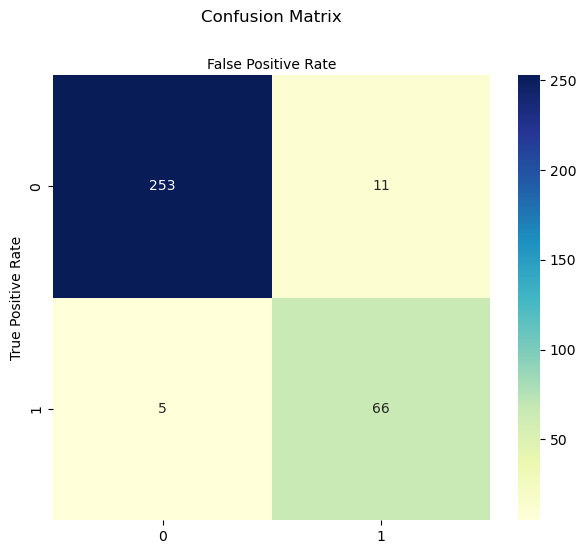

In [65]:
categories = [0, 1]  # non-smoker = 0, smoker = 1
fig, ax = plt.subplots(figsize=(6, 5))

plt.xticks([0, 1], categories)
plt.yticks([0, 1], categories)

sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()